<a href="https://colab.research.google.com/github/Gjeffroy/labelling_data_with_llm/blob/main/label_data_with_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
! pip install openai
! pip install langchain
! pip install pandas

## Add OpenAi APi key to colab Secret

To add a secret key to colab -> check this twit !

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">You can now safely store your private keys, such as your <a href="https://twitter.com/huggingface?ref_src=twsrc%5Etfw">@huggingface</a> or <a href="https://twitter.com/kaggle?ref_src=twsrc%5Etfw">@kaggle</a> API tokens, in Colab! Values stored in Secrets are private, visible only to you and the notebooks you select. <a href="https://t.co/dz9noetUAL">pic.twitter.com/dz9noetUAL</a></p>&mdash; Colaboratory (@GoogleColab) <a href="https://twitter.com/GoogleColab/status/1719798406195867814?ref_src=twsrc%5Etfw">November 1, 2023</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

In [14]:
import os
from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get('openai_API_key')

## Load Libraries

In [77]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain
import pandas as pd

Place the bfro_locations.csv in the sample data folder.
The data are available here :

In [86]:
data = pd.read_csv("./sample_data/bfro_locations.csv")
print(len(data))

4309


In [46]:
from langchain.output_parsers import ResponseSchema
from langchain.output_parsers import StructuredOutputParser

In [50]:
time_schema = ResponseSchema(name="time",
                             description="""is the encounter has been occur at nighttime or daytime \
                                          Possible values to return : nighttime, daytime, na """)
profil_schema = ResponseSchema(name="profil",
                                      description="""profil of the individual, value can be biker, driver, hiker, etc.. \
                                          If this information is not found, output NA.""")
location_type_schema = ResponseSchema(name="location_type",
                                    description="""the type of location, value can be road, house, nature, etc.. \
                                    If this information is not found, output NA.""")

response_schemas = [time_schema,
                    profil_schema,
                    location_type_schema]

In [57]:
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)
format_instructions = output_parser.get_format_instructions()

In [88]:
labelling_template = """\

The following report is about BigFoot sighting. \
For the following text, extract the following information: \

time: is the encounter has been occur at nighttime or daytime \
Possible values to return : nighttime, daytime, NA \

profil: profil of the individual, value can be biker, driver, hiker, etc.. \
  If this information is not found, output NA. \

location_type: the type of location, value can be road, house, nature, etc.. \
   If this information is not found, output NA. \

Values should always be lower cap !!

report : {report}. \

{format_instructions}
"""

prompt = ChatPromptTemplate.from_template(template=labelling_template)

In [99]:
print(prompt)

input_variables=['format_instructions', 'report'] messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['format_instructions', 'report'], template='\nThe following report is about BigFoot sighting. For the following text, extract the following information: \ntime :is the encounter has been occur at nighttime or daytime Possible values to return : nighttime, daytime, NA \nprofil: profil of the individual, value can be biker, driver, hiker, etc..   If this information is not found, output NA. \nlocation_type: the type of location, value can be road, house, nature, etc..    If this information is not found, output NA. \nValues should always be lower cap !!\n\nreport : {report}. \n{format_instructions}\n'))]


In [89]:
chat = ChatOpenAI(temperature=0.0)

In [90]:
def get_labels

labels = []
data_sub = data[:20]
for index, row in data_sub.iterrows():
    # Run the chain
    messages = prompt.format_messages(report=row['title'],
                                      format_instructions=format_instructions)
    response = chat(messages)
    output_dict = output_parser.parse(response.content)
    labels.append(output_dict)

df_results = pd.DataFrame.from_dict(labels)

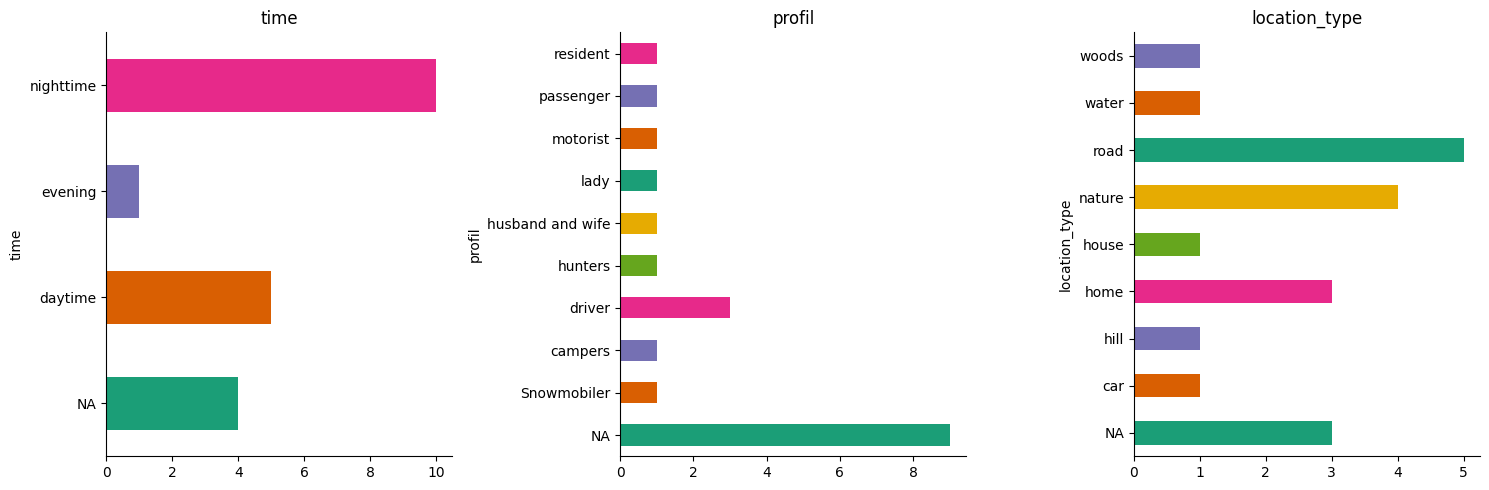

In [101]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for 'col1'
df_results.groupby('time').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[0])
axes[0].spines[['top', 'right']].set_visible(False)
axes[0].set_title('time')

# Plot for 'col2'
df_results.groupby('profil').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[1])
axes[1].spines[['top', 'right']].set_visible(False)
axes[1].set_title('profil')

# Plot for 'col3'
df_results.groupby('location_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[2])
axes[2].spines[['top', 'right']].set_visible(False)
axes[2].set_title('location_type')

plt.tight_layout()
plt.show()

In [100]:
df_results

,time,profil,location_type
0,nighttime,campers,nature
1,nighttime,driver,car
2,nighttime,NA,house
3,daytime,driver,road
4,NA,Snowmobiler,nature
5,nighttime,passenger,road
6,daytime,NA,NA
7,daytime,NA,road
8,NA,NA,NA
9,nighttime,NA,nature
